# Exercise Set 6: Data Structuring 2

*Afternoon, August 14, 2019*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [2]:
# [Answer to Ex. 6.1.1]

# Run this bit of code to get the weather data needed for Exercise Set 6.
# you will get a dataframe called df_sorted, which is equivalent to the one 
# you should have saved in Exercise Set 4. 

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])
df_sorted.head()

,station,datetime,obs_type,obs_value,TMAX_F
16,ITE00100550,18640117,TMAX,-6.3,20.66
17,ITE00100550,18640118,TMAX,-5.0,23.00
13,ITE00100550,18640114,TMAX,-5.0,23.00
12,ITE00100550,18640113,TMAX,-4.3,24.26
14,ITE00100550,18640115,TMAX,-3.1,26.42


> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [3]:
# [Answer to Ex. 6.1.2]

df_sorted['normalised_date'] = pd.to_datetime(df_sorted['datetime'].astype(str))

# month column
df_sorted['month'] = df_sorted.normalised_date.dt.month
df_sorted.head()

,station,datetime,obs_type,obs_value,TMAX_F,normalised_date,month
16,ITE00100550,18640117,TMAX,-6.3,20.66,1864-01-17,1
17,ITE00100550,18640118,TMAX,-5.0,23.00,1864-01-18,1
13,ITE00100550,18640114,TMAX,-5.0,23.00,1864-01-14,1
12,ITE00100550,18640113,TMAX,-4.3,24.26,1864-01-13,1
14,ITE00100550,18640115,TMAX,-3.1,26.42,1864-01-15,1


> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

<function matplotlib.pyplot.show(*args, **kw)>

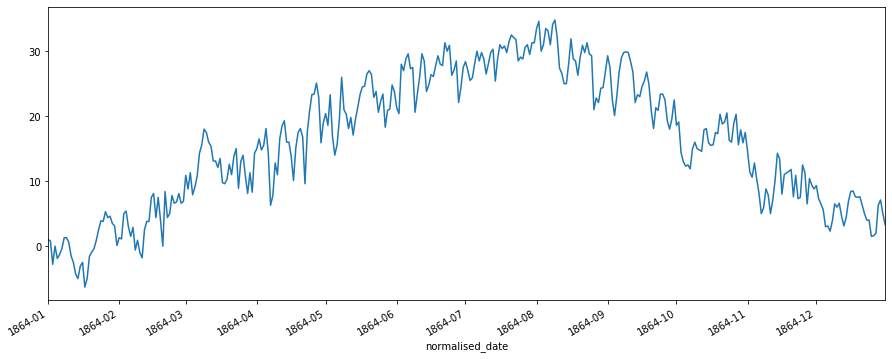

In [4]:
# [Answer to Ex. 6.1.3]

df_sorted\
    .set_index('normalised_date')\
    .obs_value\
    .plot(figsize=[15,6])
plt.show

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [31]:
# [Answer to Ex. 6.1.4]

df_sorted['country code'] = df_sorted['station'].str[:3]
df_sorted.head()

,station,datetime,obs_type,obs_value,TMAX_F,normalised_date,month,country code
16,ITE00100550,18640117,TMAX,-6.3,20.66,1864-01-17,1,ITE
17,ITE00100550,18640118,TMAX,-5.0,23.00,1864-01-18,1,ITE
13,ITE00100550,18640114,TMAX,-5.0,23.00,1864-01-14,1,ITE
12,ITE00100550,18640113,TMAX,-4.3,24.26,1864-01-13,1,ITE
14,ITE00100550,18640115,TMAX,-3.1,26.42,1864-01-15,1,ITE


> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [71]:
url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_all = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_all.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_all['obs_value'] = df_weather['obs_value'] / 10
df_all_select = df_all.loc[(df_all['obs_type'] =='TMAX')].copy()
df_all_sorted = df_all_select.sort_values(by=['obs_value'])

#normalized date
df_all_sorted['normalised_date'] = pd.to_datetime(df_all_sorted['datetime'].astype(str))

# month column
df_all_sorted['month'] = df_all_sorted.normalised_date.dt.month

 #country code
df_all_sorted['country code'] = df_all_sorted['station'].str[:3]

df_all_sorted['country code'].unique()

# for x in df_all_sorted.drop['country code']('obs_value', axis=1):
#     plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# #

array(['SZ0', 'CA0', 'EZE', 'GM0', 'GME', 'AU0', 'ITE', 'BE0', 'UK0',
       'EIE', 'AGE', 'ASN'], dtype=object)

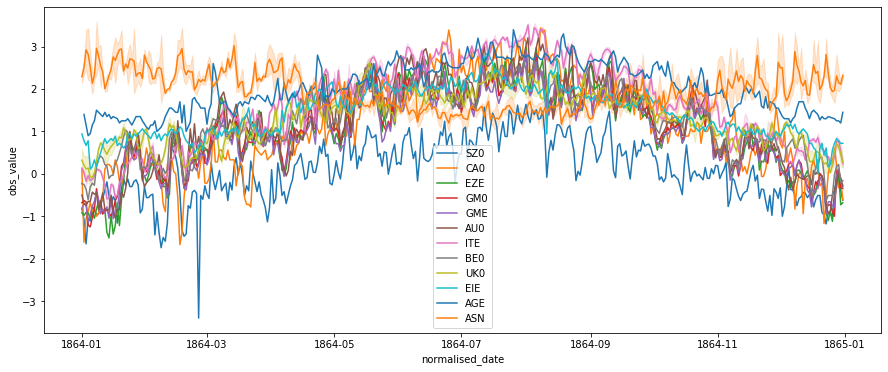

In [75]:
import seaborn as sns

f, ax = plt.subplots(figsize=(15,6))

for i in df_all_sorted['country code'].unique():
    df_subset = df_all_sorted[df_all_sorted['country code']==i]
    sns.lineplot(x='normalised_date', y='obs_value', data=df_subset, label=i)

##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [7]:
# [Answer to Ex. 6.2.1]

> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the  `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [8]:
# [Answer to Ex. 6.2.2]

> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [9]:
# [Answer to Ex. 6.2.3]

> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [10]:
# [Answer to Ex. 6.2.4]